# Compare results of simulation data

### Purpose:
Pulls in data from all simulations and comparse the results from the different models:

- No node covariate data
- Using node covariate data
- Using node covariate data with lasso
- Using node covariate data with measurement error-aware lasso

In [1]:
import networkx as nx
import random
import numpy as np
import scipy.stats as sp
import scipy.special as spec
import scipy.optimize as opt
import sklearn.metrics as skm
#import sklearn.linear_model as sk
import sklearn.metrics as skm
import scipy.spatial.distance as spdist
import pandas as pd
import pickle
import sys
from textwrap import wrap
import os

import matplotlib.pyplot as plt

In [2]:
from joint_estimation_utils_ME_20250922 import *

In [3]:
def load_pickle_file(file_path):
    """Load a pickle file and return its content."""
    with open(file_path, 'rb') as file:
        return pickle.load(file)
    
def load_file_set(files):
    est_Z, est_Z_true, est_B, est_B_true, auc_A, auc_Y, delta_LP, delta_LP_true, removed, Z = [], [], [], [], [], [], [], [], [], []

    for file in files:
        if os.path.exists(file) == False:
            print("No file: ", file)
        else:
            res = load_pickle_file(file)
           
            if res['post'] != []:
                if res['post'][0]['aucA']==-np.inf:
                    print("No aucA for ", file)
                    continue
                        
                auc_A.append(list(res['pre']['aucA'] + list(res['post'][0]['aucA'])))
                auc_Y.append(list(res['pre']['aucY'] + list(res['post'][0]['aucY'])))
                est_Z.append(list(res['pre']['delta_Z'] + list(res['post'][0]['delta_Z'])))
                #est_Z_true.append(list(res['post'][0]['delta_Z_true'])[-1])
                est_B.append(list(res['pre']['delta_B'] + list(res['post'][0]['delta_B'])))
                #est_B_true.append(list(res['post'][0]['delta_B_true'])[-1])
                delta_LP.append(list(res['pre']['delta_LP'] + list(res['post'][0]['delta_LP'])))
                #delta_LP_true.append(list(res['post'][0]['delta_LP_true'])[-1])
                removed.append(res['post'][0]['removed'])
                Z.append(res['post'][0]['Z'])
            else:
                auc_A.append(res['pre']['aucA'])
                auc_Y.append(res['pre']['aucY'])
                est_Z.append(res['pre']['delta_Z'])
                #est_Z_true.append(list(res['pre']['delta_Z_true'])[-1])
                est_B.append(list(res['pre']['delta_B']))
                #est_B_true.append(list(res['pre']['delta_B_true'] )[-1])
                delta_LP.append(res['pre']['delta_LP'])
                #delta_LP_true.append(res['pre']['delta_LP_true'][-1])
                Z.append(res['pre']['Z'])
        
    if any("glasso" in s or "MEglasso" in s for s in files):
        return est_Z, est_B,auc_A, auc_Y, delta_LP, removed, Z#, est_Z_true,  est_B_true,  delta_LP_true,
    else:
        return est_Z, est_B, auc_A, auc_Y, delta_LP, Z#, est_Z_true,  est_B_true,  delta_LP_true,



def get_file_list(max_sims, date, runtype, noisedim, start = 1, exception_date = None, exception_N = None):
    file_list = []

    for i in range(start, max_sims+1):
        if (exception_N != None):
            if (i in exception_N):
                date2 = exception_date
            else:
                date2 = date
        else:
            date2 = date
            
        if runtype not in ["nocov", "nocov_date2"]:
            file_list.append("sim_" + str(runtype) + "_noiseq" + str(noisedim) + "-25_" +'lambda0.1_adagrad_'+ str(date2) + "_" + str(i) + ".pkl")
        else:
            file_list.append("sim_" + str(runtype) + "_noiseq" + str(noisedim) + "-25_adagrad_" + str(date2) + "_" + str(i) + ".pkl")
        
    return file_list

# Sparse Data

In [9]:
max_sims = 30
date = "2026-01-07"

nocov_0noise_files = get_file_list(max_sims, date, "nocov", 0)
nocov_10noise_files = get_file_list(max_sims, date, "nocov", 10)
nocov_20noise_files = get_file_list(max_sims, date, "nocov", 20)


In [10]:
max_sims = 30
date = "2026-01-07"

nolasso_0noise_files = get_file_list(max_sims, date, "nolasso", 0)
nolasso_10noise_files = get_file_list(max_sims, date, "nolasso", 10)
nolasso_20noise_files = get_file_list(max_sims, date, "nolasso", 20)


In [6]:
max_sims = 30
date = "2026-01-08"

glasso_0noise_files = get_file_list(max_sims, date, "glasso", 0)
glasso_10noise_files = get_file_list(max_sims, date, "glasso", 10)
glasso_20noise_files = get_file_list(max_sims, date, "glasso", 20)


In [7]:
max_sims = 30
date = "2026-01-08"

MEglasso_0noise_files = get_file_list(max_sims, date, "MEglasso", 0)
MEglasso_10noise_files = get_file_list(max_sims, date, "MEglasso", 10)
MEglasso_20noise_files = get_file_list(max_sims, date, "MEglasso", 20)


In [11]:
(nocov_0noise_est_Z, nocov_0noise_est_B, nocov_0noise_auc_A, 
 nocov_0noise_auc_Y, nocov_0noise_delta_LP, nocov_0noise_Z) = load_file_set(nocov_0noise_files)

(nocov_10noise_est_Z, nocov_10noise_est_B,nocov_10noise_auc_A, 
 nocov_10noise_auc_Y, nocov_10noise_delta_LP, nocov_10noise_Z) = load_file_set(nocov_10noise_files)

(nocov_20noise_est_Z, nocov_20noise_est_B, nocov_20noise_auc_A, 
 nocov_20noise_auc_Y, nocov_20noise_delta_LP, nocov_20noise_Z) = load_file_set(nocov_20noise_files)

In [12]:
(nolasso_0noise_est_Z, nolasso_0noise_est_B, nolasso_0noise_auc_A, 
nolasso_0noise_auc_Y, nolasso_0noise_delta_LP, nolasso_0noise_Z) = load_file_set(nolasso_0noise_files)

(nolasso_10noise_est_Z, nolasso_10noise_est_B, nolasso_10noise_auc_A, 
nolasso_10noise_auc_Y, nolasso_10noise_delta_LP, nolasso_10noise_Z) = load_file_set(nolasso_10noise_files)

(nolasso_20noise_est_Z, nolasso_20noise_est_B, nolasso_20noise_auc_A, 
nolasso_20noise_auc_Y, nolasso_20noise_delta_LP, nolasso_20noise_Z) = load_file_set(nolasso_20noise_files)

In [13]:
(glasso_0noise_est_Z, glasso_0noise_est_B, glasso_0noise_auc_A, 
 glasso_0noise_auc_Y, glasso_0noise_delta_LP, r0, glasso_0noise_Z) = load_file_set(glasso_0noise_files)

(glasso_10noise_est_Z, glasso_10noise_est_B, glasso_10noise_auc_A, 
 glasso_10noise_auc_Y, glasso_10noise_delta_LP, r10, glasso_10noise_Z) = load_file_set(glasso_10noise_files)

(glasso_20noise_est_Z, glasso_20noise_est_B_true, glasso_20noise_auc_A, 
 glasso_20noise_auc_Y, glasso_20noise_delta_LP, r20, glasso_20noise_Z) = load_file_set(glasso_20noise_files)

In [14]:
(MEglasso_0noise_est_Z, MEglasso_0noise_est_B, MEglasso_0noise_auc_A, 
 MEglasso_0noise_auc_Y, MEglasso_0noise_delta_LP, MEr0, MEglasso_0noise_Z) = load_file_set(MEglasso_0noise_files)

(MEglasso_10noise_est_Z, MEglasso_10noise_est_B, MEglasso_10noise_auc_A, 
 MEglasso_10noise_auc_Y, MEglasso_10noise_delta_LP,MEr10, MEglasso_10noise_Z) = load_file_set(MEglasso_10noise_files)

(MEglasso_20noise_est_Z, MEglasso_20noise_est_B, MEglasso_20noise_auc_A, 
 MEglasso_20noise_auc_Y, MEglasso_20noise_delta_LP, MEr20, MEglasso_20noise_Z) = load_file_set(MEglasso_20noise_files)

### Results:

- Figure comparing AUC for A and Y
- Mean and standard deviation of AUC over the 30 simulations

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


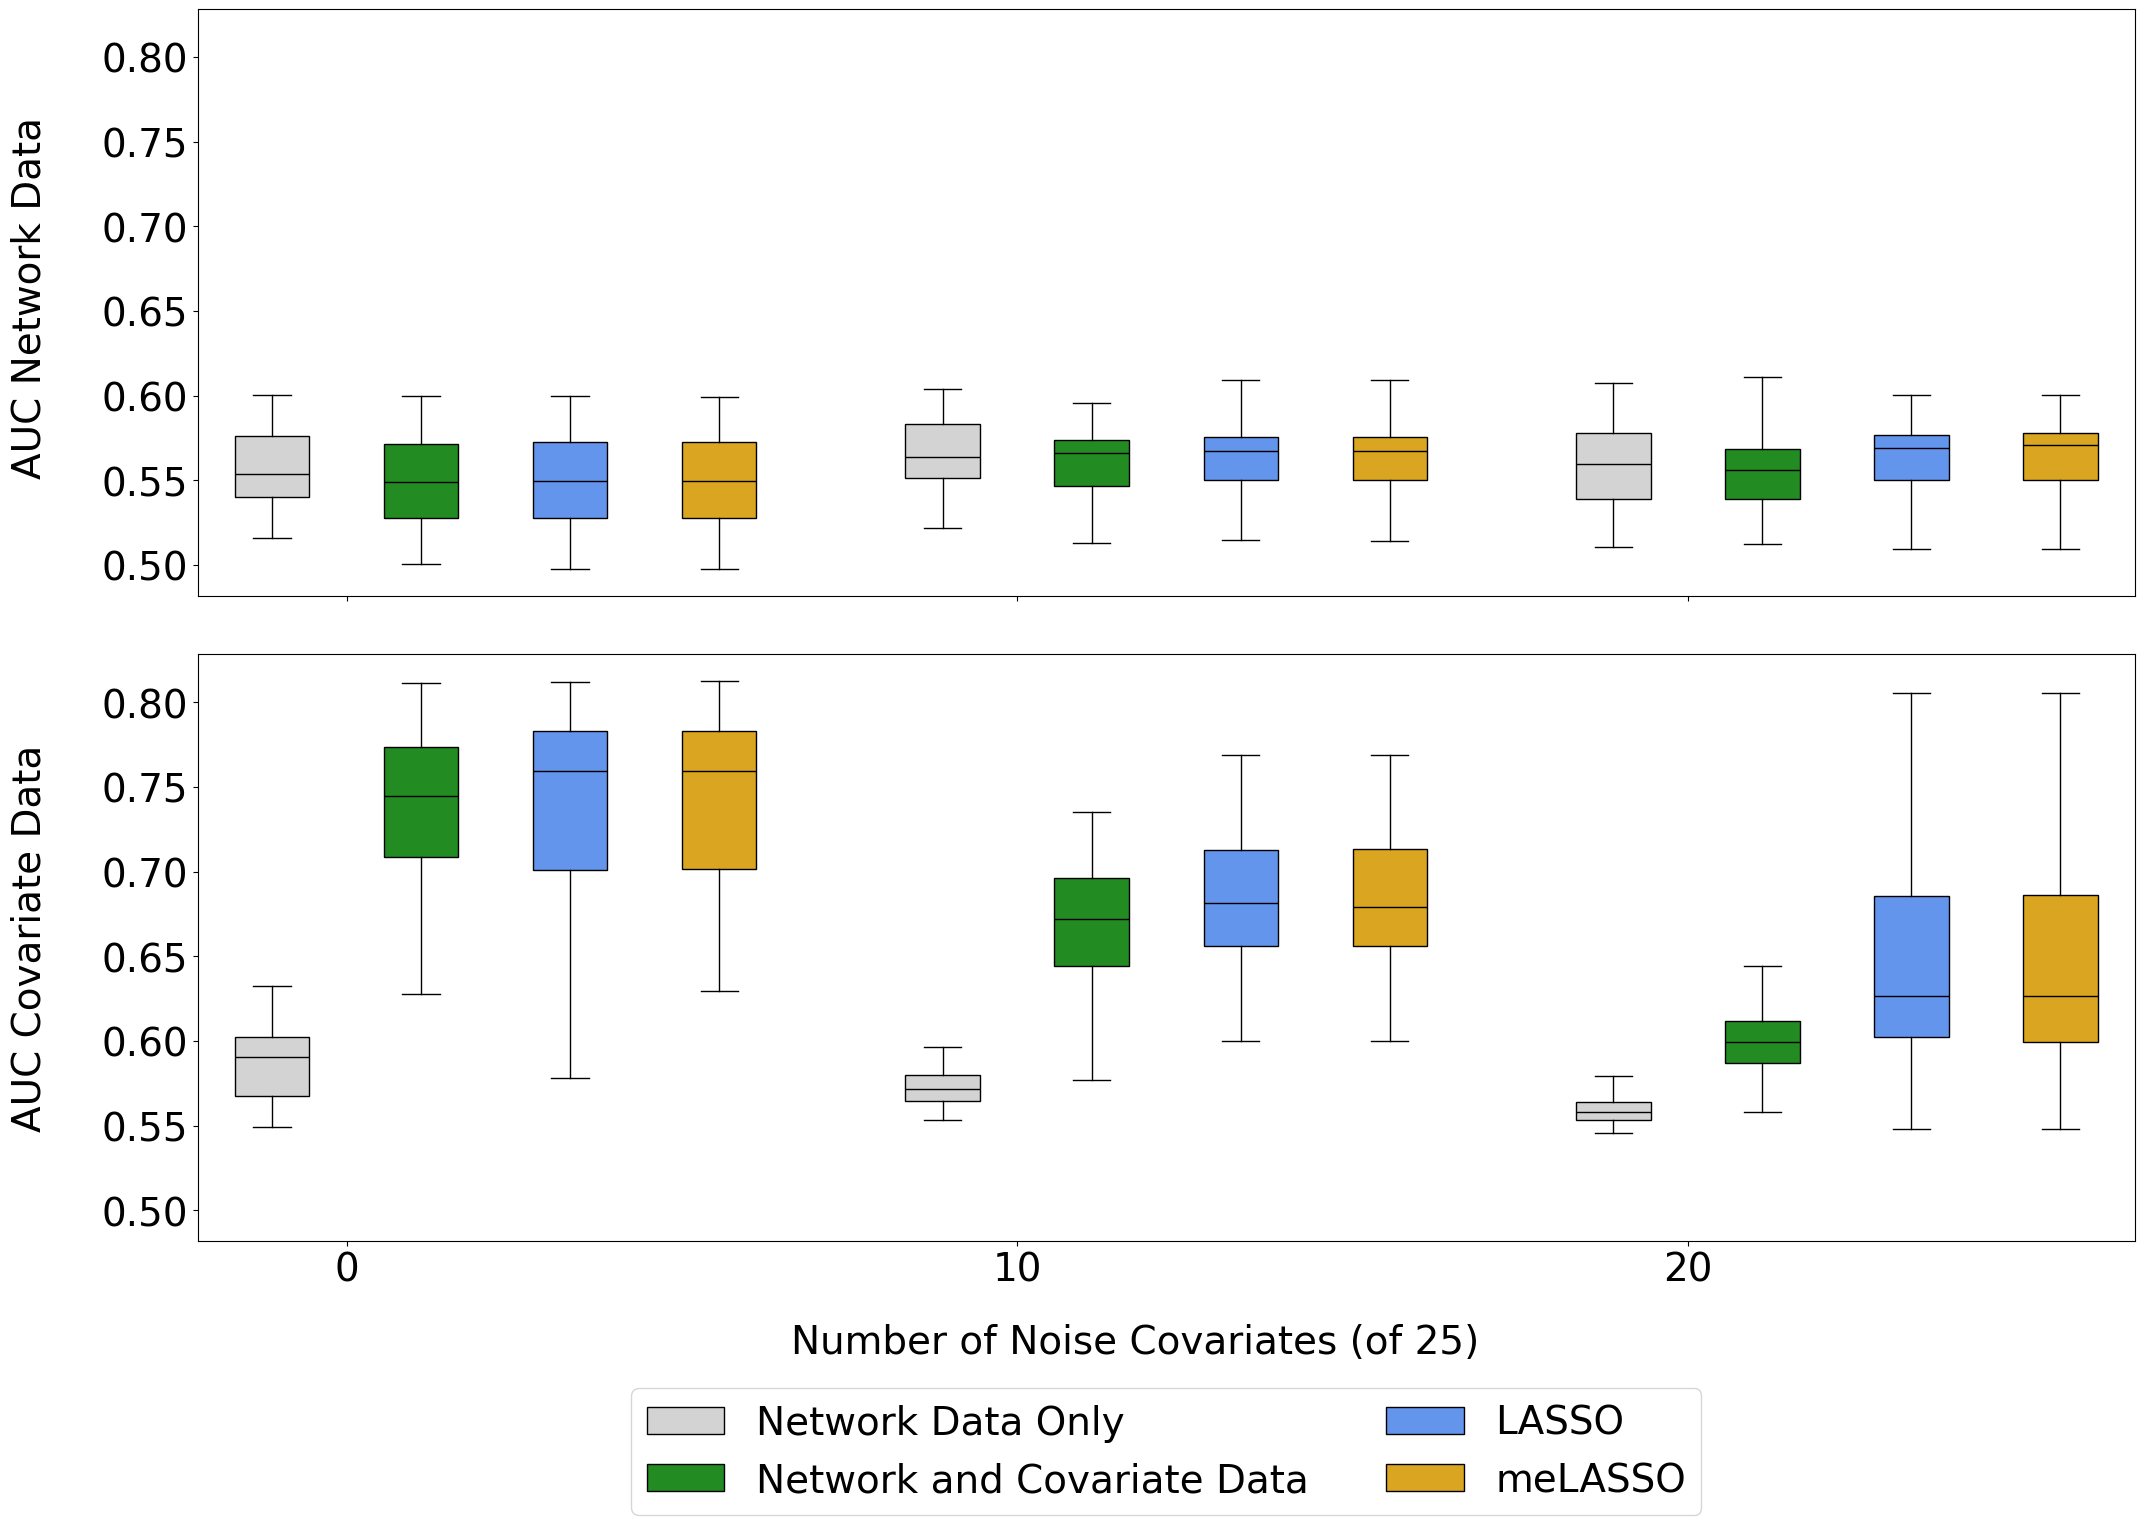

In [40]:
# Set all font sizes
SMALL_SIZE = 28
MEDIUM_SIZE = 30
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

n = 4.5
pos_nocov = list(np.arange(0, n*3, n))
pos_nolasso = list(np.arange(1, n*3, n))
pos_adapt = list(np.arange(2, n*3, n))
pos_MEadapt = list(np.arange(3, n*3, n))

dat_nocov = [[x[-1] for x in nocov_0noise_auc_A] , [x[-1] for x in nocov_10noise_auc_A], [x[-1] for x in nocov_20noise_auc_A]]
dat_nolasso =  [[x[-1] for x in nolasso_0noise_auc_A], [x[-1] for x in nolasso_10noise_auc_A], [x[-1] for x in nolasso_20noise_auc_A]]
dat_adapt = [[x[-1] for x in glasso_0noise_auc_A], [x[-1] for x in glasso_10noise_auc_A], [x[-1] for x in glasso_20noise_auc_A]]
dat_MEadapt = [[x[-1] for x in MEglasso_0noise_auc_A], [x[-1] for x in MEglasso_10noise_auc_A], [x[-1] for x in MEglasso_20noise_auc_A]]

dat_nocovY = [[x[-1] for x in nocov_0noise_auc_Y], [x[-1] for x in nocov_10noise_auc_Y], [x[-1] for x in nocov_20noise_auc_Y]]
dat_nolassoY =  [[x[-1] for x in nolasso_0noise_auc_Y], [x[-1] for x in nolasso_10noise_auc_Y], [x[-1] for x in nolasso_20noise_auc_Y]]
dat_adaptY = [[x[-1] for x in glasso_0noise_auc_Y], [x[-1] for x in glasso_10noise_auc_Y], [x[-1] for x in glasso_20noise_auc_Y]]
dat_MEadaptY = [[x[-1] for x in MEglasso_0noise_auc_Y], [x[-1] for x in MEglasso_10noise_auc_Y], [x[-1] for x in MEglasso_20noise_auc_Y]]

fig  = plt.figure(figsize = (25,16))
gs = fig.add_gridspec(2, 1, hspace=0.1, wspace=0.0)
(ax1, ax2) = gs.subplots( sharey=True, sharex=True)#sharex='row',

boxnocov = ax1.boxplot(dat_nocov, showfliers=False, positions = pos_nocov, patch_artist=True)
boxnolasso = ax1.boxplot(dat_nolasso, showfliers=False, positions = pos_nolasso, patch_artist=True)
boxadapt = ax1.boxplot(dat_adapt, showfliers=False, positions = pos_adapt, patch_artist=True)
boxMEadapt = ax1.boxplot(dat_MEadapt, showfliers=False, positions = pos_MEadapt, patch_artist=True)

# Apply the fill color to each dataset
for patch in boxnocov['boxes']:
    patch.set_facecolor('lightgray')
    
for patch in boxnolasso['boxes']:
    patch.set_facecolor('forestgreen')
    
for patch in boxadapt['boxes']:
    patch.set_facecolor('cornflowerblue')
    
for patch in boxMEadapt['boxes']:
    patch.set_facecolor('goldenrod')
    
for median in boxnocov['medians']:
    median.set_color('black')
    
for median in boxnolasso['medians']:
    median.set_color('black')
    
for median in boxadapt['medians']:
    median.set_color('black')
    
for median in boxMEadapt['medians']:
    median.set_color('black')
    
boxnocov = ax2.boxplot(dat_nocovY, showfliers=False, positions = pos_nocov, patch_artist=True)
boxnolasso = ax2.boxplot(dat_nolassoY, showfliers=False, positions = pos_nolasso, patch_artist=True)
boxadapt = ax2.boxplot(dat_adaptY, showfliers=False, positions = pos_adapt, patch_artist=True)
boxMEadapt = ax2.boxplot(dat_MEadaptY, showfliers=False, positions = pos_MEadapt, patch_artist=True)

# Apply the fill color to each dataset
for patch in boxnocov['boxes']:
    patch.set_facecolor('lightgray')
    
for patch in boxnolasso['boxes']:
    patch.set_facecolor('forestgreen')
    
for patch in boxadapt['boxes']:
    patch.set_facecolor('cornflowerblue')
    
    
for patch in boxMEadapt['boxes']:
    patch.set_facecolor('goldenrod')
    
for median in boxnocov['medians']:
    median.set_color('black')
    
for median in boxnolasso['medians']:
    median.set_color('black')
    
for median in boxadapt['medians']:
    median.set_color('black')
    
for median in boxMEadapt['medians']:
    median.set_color('black')
    
group_midpoints = [(positions[0] + positions[-1]) / 2 for positions in zip(pos_nocov, pos_nolasso)]#, pos_adapt)]
group_labels = ['0', '10', '20']  # Labels for each group

ax2.set_xticks(group_midpoints)     # Set x-ticks to the midpoints of each group
ax2.set_xticklabels(group_labels)

fig.text(0.5, 0.04, 'Number of Noise Covariates (of 25)', ha='center')
fig.text(0.05, 0.3, 'AUC Covariate Data', va='center', rotation='vertical')
fig.text(0.05, 0.7, 'AUC Network Data', va='center', rotation='vertical')

#fig.text(0.05, 0.85, 'A)', va='center', fontweight = 'bold', fontsize = 30)
#fig.text(0.05, 0.45, 'B)', va='center', fontweight = 'bold', fontsize = 30)


plt.legend([boxnocov["boxes"][0], boxnolasso["boxes"][0], boxadapt["boxes"][0], boxMEadapt["boxes"][0]], 
          ['Network Data Only', 'Network and Covariate Data', "LASSO", "meLASSO"], loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol = 2) 


plt.savefig('boxplot_AUCA_AUCY_20260108.eps', dpi=600, bbox_inches = "tight")

In [16]:
print("No covariates")
print([(np.mean(sub), np.std(sub)) for sub in dat_nocov])
print("No lasso")
print([(np.mean(sub), np.std(sub)) for sub in dat_nolasso])
print("glasso")
print([(np.mean(sub), np.std(sub)) for sub in dat_adapt])
print("ME glasso")
print([(np.mean(sub), np.std(sub)) for sub in dat_MEadapt])

No covariates
[(0.5572947048182322, 0.02415853721611784), (0.5666990305108298, 0.02318050007783586), (0.5598256585056802, 0.02843669520000463)]
No lasso
[(0.5496314517247867, 0.02440202015678048), (0.5624156781607293, 0.02422281804041347), (0.5572517718991271, 0.025672249712685495)]
glasso
[(0.550515171751843, 0.026197442012418276), (0.5618515659248288, 0.027096803728336838), (0.5634129950558814, 0.023675109498442884)]
ME glasso
[(0.5504622480190762, 0.026142900386778467), (0.5618457250780187, 0.027098753391314623), (0.5640630614690261, 0.02379759244515568)]


In [17]:
print("No covariates")
print([(np.mean(sub), np.std(sub)) for sub in dat_nocovY])
print("No lasso")
print([(np.mean(sub), np.std(sub)) for sub in dat_nolassoY])
print("glasso")
print([(np.mean(sub), np.std(sub)) for sub in dat_adaptY])
print("ME glasso")
print([(np.mean(sub), np.std(sub)) for sub in dat_MEadaptY])

No covariates
[(0.5867319457983109, 0.02247266005758344), (0.573289495920271, 0.012968541024373547), (0.5589235749888369, 0.009326133398687398)]
No lasso
[(0.7311043485415386, 0.05616021408546968), (0.6712519245068514, 0.03736976777716642), (0.5974899310403359, 0.02460375349431851)]
glasso
[(0.7392826213071761, 0.059020079810376824), (0.6809446288797907, 0.045021534246904554), (0.6914512285758369, 0.140098830751771)]
ME glasso
[(0.7393778773749307, 0.058954051480565255), (0.6807472221682642, 0.04505209822722361), (0.6912623901265753, 0.140478101370083)]


# Less Sparse Data

In [18]:
max_sims = 30
date = "2026-01-07"

nocov_0noise_files_date2 = get_file_list(max_sims, date, "nocov_date2", 0)
nocov_10noise_files_date2 = get_file_list(max_sims, date, "nocov_date2", 10)
nocov_20noise_files_date2 = get_file_list(max_sims, date, "nocov_date2", 20)

In [19]:
max_sims = 30
date = "2026-01-07"

nolasso_0noise_files_date2 = get_file_list(max_sims, date, "nolasso_date2", 0)
nolasso_10noise_files_date2 = get_file_list(max_sims, date, "nolasso_date2", 10)
nolasso_20noise_files_date2 = get_file_list(max_sims, date, "nolasso_date2", 20)

In [20]:
max_sims = 30
date = "2026-01-08"

glasso_0noise_files_date2 = get_file_list(max_sims, date, "glasso_date2", 0)
glasso_10noise_files_date2 = get_file_list(max_sims, date, "glasso_date2", 10)
glasso_20noise_files_date2 = get_file_list(max_sims, date, "glasso_date2", 20, exception_date = "2026-01-07", exception_N = [7, 12, 25])

In [21]:
max_sims = 30
date = "2026-01-08"

MEglasso_0noise_files_date2 = get_file_list(max_sims, date, "MEglasso_date2", 0)
MEglasso_10noise_files_date2 = get_file_list(max_sims, date, "MEglasso_date2", 10)
MEglasso_20noise_files_date2 = get_file_list(max_sims, date, "MEglasso_date2", 20, exception_date = "2026-01-07", exception_N = [7, 14])

In [22]:
(nocov_0noise_est_Z_d2, nocov_0noise_est_B_d2, nocov_0noise_auc_A_d2, 
 nocov_0noise_auc_Y_d2, nocov_0noise_delta_LP_d2, nocov_0noise_Z_d2) = load_file_set(nocov_0noise_files_date2)

(nocov_10noise_est_Z_d2, nocov_10noise_est_B_d2,nocov_10noise_auc_A_d2, 
 nocov_10noise_auc_Y_d2, nocov_10noise_delta_LP_d2P, nocov_10noise_Z_d2) = load_file_set(nocov_10noise_files_date2)

(nocov_20noise_est_Z_d2, nocov_20noise_est_B_d2, nocov_20noise_auc_A_d2, 
 nocov_20noise_auc_Y_d2, nocov_20noise_delta_LP_d2P, nocov_20noise_Z_d2) = load_file_set(nocov_20noise_files_date2)

In [23]:
(nolasso_0noise_est_Z_d2, nolasso_0noise_est_B_d2, nolasso_0noise_auc_A_d2, 
nolasso_0noise_auc_Y_d2, nolasso_0noise_delta_LP_d2P, nolasso_0noise_Z_d2) = load_file_set(nolasso_0noise_files_date2)

(nolasso_10noise_est_Z_d2, nolasso_10noise_est_B_d2, nolasso_10noise_auc_A_d2, 
nolasso_10noise_auc_Y_d2, nolasso_10noise_delta_LP_d2, nolasso_10noise_Z_d2) = load_file_set(nolasso_10noise_files_date2)

(nolasso_20noise_est_Z_d2, nolasso_20noise_est_B_d2, nolasso_20noise_auc_A_d2, 
nolasso_20noise_auc_Y_d2, nolasso_20noise_delta_LP_d2, nolasso_20noise_Z_d2) = load_file_set(nolasso_20noise_files_date2)

In [24]:
(glasso_0noise_est_Z_d2, glasso_0noise_est_B_d2, glasso_0noise_auc_A_d2, 
 glasso_0noise_auc_Y_d2, glasso_0noise_delta_LP_d2, r0_d2, glasso_0noise_Z_d2) = load_file_set(glasso_0noise_files_date2)

(glasso_10noise_est_Z_d2, glasso_10noise_est_B_d2, glasso_10noise_auc_A_d2, 
 glasso_10noise_auc_Y_d2, glasso_10noise_delta_LP_d2, r10_d2, glasso_10noise_Z_d2) = load_file_set(glasso_10noise_files_date2)

(glasso_20noise_est_Z_d2, glasso_20noise_est_B_true_d2, glasso_20noise_auc_A_d2, 
 glasso_20noise_auc_Y_d2, glasso_20noise_delta_LP_d2, r20_d2, glasso_20noise_Z_d2) = load_file_set(glasso_20noise_files_date2)

In [25]:
(MEglasso_0noise_est_Z_d2, MEglasso_0noise_est_B_d2, MEglasso_0noise_auc_A_d2, 
 MEglasso_0noise_auc_Y_d2, MEglasso_0noise_delta_LP_d2, MEr0_d2, MEglasso_0noise_Z_d2) = load_file_set(MEglasso_0noise_files_date2)

(MEglasso_10noise_est_Z_d2, MEglasso_10noise_est_B_d2, MEglasso_10noise_auc_A_d2, 
 MEglasso_10noise_auc_Y_d2, MEglasso_10noise_delta_LP_d2,MEr10_d2, MEglasso_10noise_Z_d2) = load_file_set(MEglasso_10noise_files_date2)

(MEglasso_20noise_est_Z_d2, MEglasso_20noise_est_B_d2, MEglasso_20noise_auc_A_d2, 
 MEglasso_20noise_auc_Y_d2, MEglasso_20noise_delta_LP_d2, MEr20_d2, MEglasso_20noise_Z_d2) = load_file_set(MEglasso_20noise_files_date2)

### Results:

- Figure comparing AUC for A and Y
- Mean and standard deviation of AUC over the 30 simulations

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


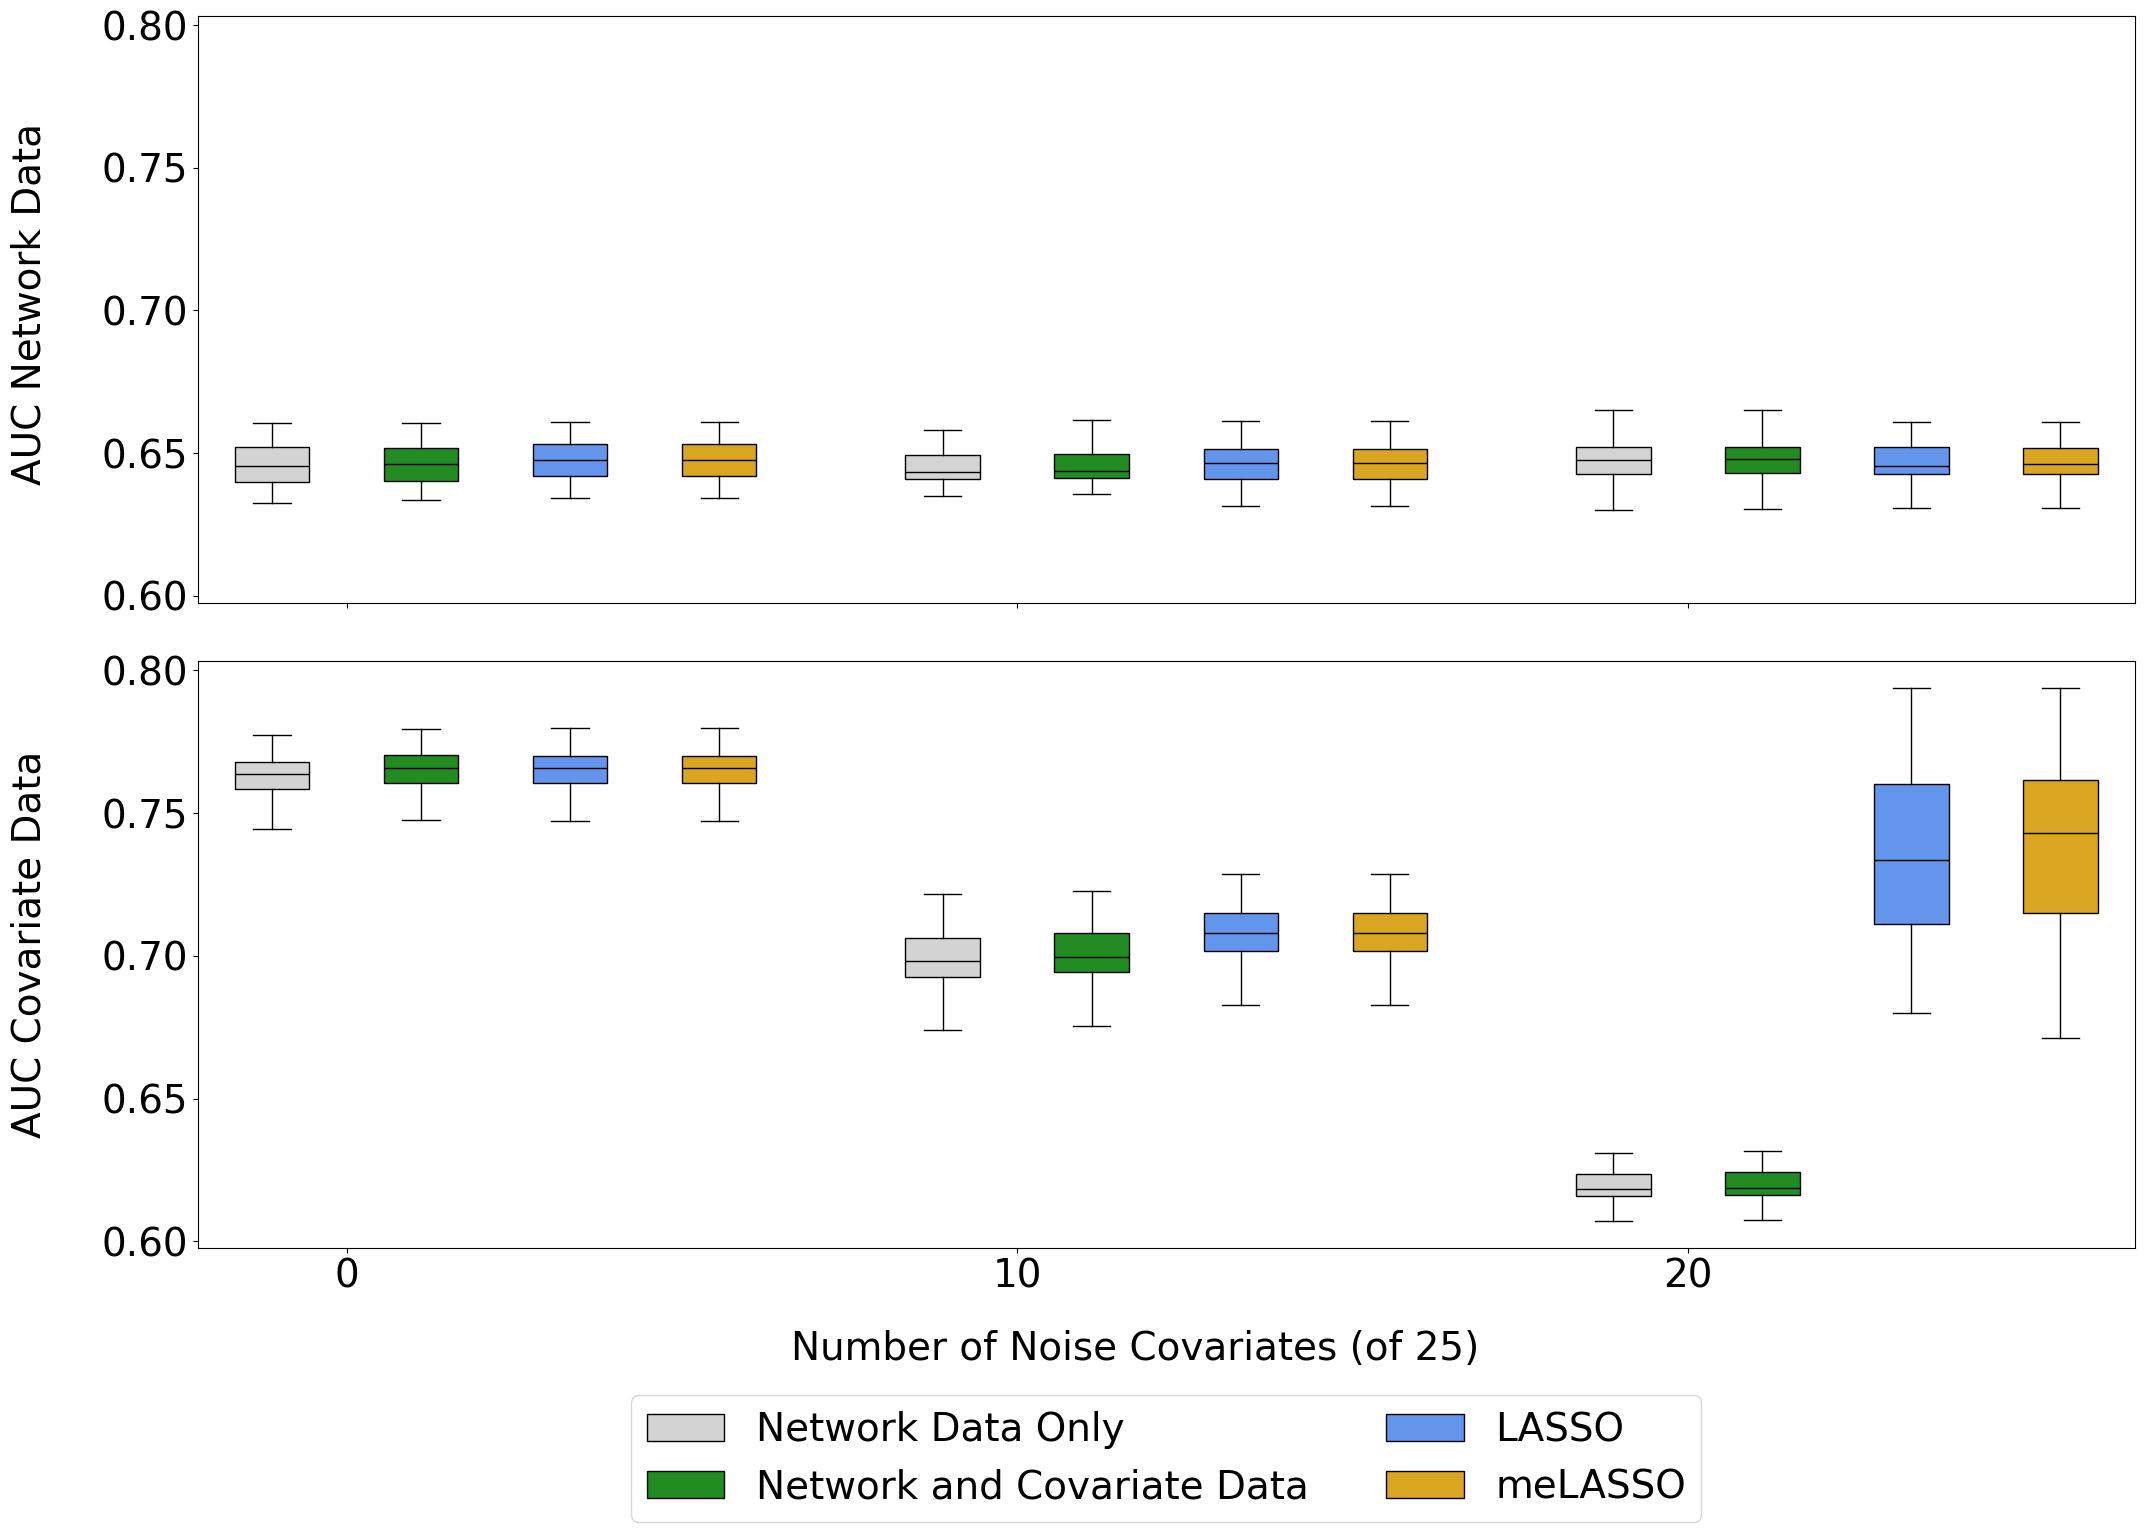

In [39]:
# Set all font sizes
SMALL_SIZE = 28
MEDIUM_SIZE = 30
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

n = 4.5
pos_nocov = list(np.arange(0, n*3, n))
pos_nolasso = list(np.arange(1, n*3, n))
pos_adapt = list(np.arange(2, n*3, n))
pos_MEadapt = list(np.arange(3, n*3, n))

dat_nocov = [[x[-1] for x in nocov_0noise_auc_A_d2] , [x[-1] for x in nocov_10noise_auc_A_d2], [x[-1] for x in nocov_20noise_auc_A_d2]]
dat_nolasso =  [[x[-1] for x in nolasso_0noise_auc_A_d2], [x[-1] for x in nolasso_10noise_auc_A_d2], [x[-1] for x in nolasso_20noise_auc_A_d2]]
dat_adapt = [[x[-1] for x in glasso_0noise_auc_A_d2], [x[-1] for x in glasso_10noise_auc_A_d2], [x[-1] for x in glasso_20noise_auc_A_d2]]
dat_MEadapt = [[x[-1] for x in MEglasso_0noise_auc_A_d2], [x[-1] for x in MEglasso_10noise_auc_A_d2], [x[-1] for x in MEglasso_20noise_auc_A_d2]]

dat_nocovY = [[x[-1] for x in nocov_0noise_auc_Y_d2], [x[-1] for x in nocov_10noise_auc_Y_d2], [x[-1] for x in nocov_20noise_auc_Y_d2]]
dat_nolassoY =  [[x[-1] for x in nolasso_0noise_auc_Y_d2], [x[-1] for x in nolasso_10noise_auc_Y_d2], [x[-1] for x in nolasso_20noise_auc_Y_d2]]
dat_adaptY = [[x[-1] for x in glasso_0noise_auc_Y_d2], [x[-1] for x in glasso_10noise_auc_Y_d2], [x[-1] for x in glasso_20noise_auc_Y_d2]]
dat_MEadaptY = [[x[-1] for x in MEglasso_0noise_auc_Y_d2], [x[-1] for x in MEglasso_10noise_auc_Y_d2], [x[-1] for x in MEglasso_20noise_auc_Y_d2]]

fig  = plt.figure(figsize = (25,16))
gs = fig.add_gridspec(2, 1, hspace=0.1, wspace=0.0)
(ax1, ax2) = gs.subplots( sharey=True, sharex=True)#sharex='row',

boxnocov = ax1.boxplot(dat_nocov, showfliers=False, positions = pos_nocov, patch_artist=True)
boxnolasso = ax1.boxplot(dat_nolasso, showfliers=False, positions = pos_nolasso, patch_artist=True)
boxadapt = ax1.boxplot(dat_adapt, showfliers=False, positions = pos_adapt, patch_artist=True)
boxMEadapt = ax1.boxplot(dat_MEadapt, showfliers=False, positions = pos_MEadapt, patch_artist=True)

# Apply the fill color to each dataset
for patch in boxnocov['boxes']:
    patch.set_facecolor('lightgray')
    
for patch in boxnolasso['boxes']:
    patch.set_facecolor('forestgreen')
    
for patch in boxadapt['boxes']:
    patch.set_facecolor('cornflowerblue')
    
for patch in boxMEadapt['boxes']:
    patch.set_facecolor('goldenrod')
    
for median in boxnocov['medians']:
    median.set_color('black')
    
for median in boxnolasso['medians']:
    median.set_color('black')
    
for median in boxadapt['medians']:
    median.set_color('black')
    
for median in boxMEadapt['medians']:
    median.set_color('black')
    
boxnocov = ax2.boxplot(dat_nocovY, showfliers=False, positions = pos_nocov, patch_artist=True)
boxnolasso = ax2.boxplot(dat_nolassoY, showfliers=False, positions = pos_nolasso, patch_artist=True)
boxadapt = ax2.boxplot(dat_adaptY, showfliers=False, positions = pos_adapt, patch_artist=True)
boxMEadapt = ax2.boxplot(dat_MEadaptY, showfliers=False, positions = pos_MEadapt, patch_artist=True)

# Apply the fill color to each dataset
for patch in boxnocov['boxes']:
    patch.set_facecolor('lightgray')
    
for patch in boxnolasso['boxes']:
    patch.set_facecolor('forestgreen')
    
for patch in boxadapt['boxes']:
    patch.set_facecolor('cornflowerblue')
    
    
for patch in boxMEadapt['boxes']:
    patch.set_facecolor('goldenrod')
    
for median in boxnocov['medians']:
    median.set_color('black')
    
for median in boxnolasso['medians']:
    median.set_color('black')
    
for median in boxadapt['medians']:
    median.set_color('black')
    
for median in boxMEadapt['medians']:
    median.set_color('black')
    
group_midpoints = [(positions[0] + positions[-1]) / 2 for positions in zip(pos_nocov, pos_nolasso)]#, pos_adapt)]
group_labels = ['0', '10', '20']  # Labels for each group

ax2.set_xticks(group_midpoints)     # Set x-ticks to the midpoints of each group
ax2.set_xticklabels(group_labels)

fig.text(0.5, 0.04, 'Number of Noise Covariates (of 25)', ha='center')
fig.text(0.05, 0.3, 'AUC Covariate Data', va='center', rotation='vertical')
fig.text(0.05, 0.7, 'AUC Network Data', va='center', rotation='vertical')

#fig.text(0.05, 0.9, 'A)', va='center', fontweight = 'bold', fontsize = 30)
#fig.text(0.05, 0.48, 'B)', va='center', fontweight = 'bold', fontsize = 30)

plt.legend([boxnocov["boxes"][0], boxnolasso["boxes"][0], boxadapt["boxes"][0], boxMEadapt["boxes"][0]], 
          ['Network Data Only', 'Network and Covariate Data', "LASSO", "meLASSO"], loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol = 2) 

plt.savefig('boxplot_AUCA_AUCY_dense_20260108.eps', dpi=600, bbox_inches = "tight")

In [27]:
print("No covariates")
print([(np.mean(sub), np.std(sub)) for sub in dat_nocov])
print("No lasso")
print([(np.mean(sub), np.std(sub)) for sub in dat_nolasso])
print("glasso")
print([(np.mean(sub), np.std(sub)) for sub in dat_adapt])
print("ME glasso")
print([(np.mean(sub), np.std(sub)) for sub in dat_MEadapt])

No covariates
[(0.6463223554565788, 0.007465497270385684), (0.6456355950193575, 0.007089833425099895), (0.6480215896902592, 0.008139922536896967)]
No lasso
[(0.6467137706505025, 0.007345080184646065), (0.6459112466630325, 0.0070409484358532086), (0.648117508116442, 0.00811984307714251)]
glasso
[(0.6479000729282812, 0.007367532396722605), (0.6463629751075248, 0.00717186910835367), (0.647109894649167, 0.006877196541485897)]
ME glasso
[(0.6479000739542876, 0.007367534871256919), (0.6463629455369033, 0.007171850084044304), (0.6469477434341673, 0.006845801048943198)]


In [28]:
print("No covariates")
print([(np.mean(sub), np.std(sub)) for sub in dat_nocovY])
print("No lasso")
print([(np.mean(sub), np.std(sub)) for sub in dat_nolassoY])
print("glasso")
print([(np.mean(sub), np.std(sub)) for sub in dat_adaptY])
print("ME glasso")
print([(np.mean(sub), np.std(sub)) for sub in dat_MEadaptY])

No covariates
[(0.7630270549463563, 0.007501409280249474), (0.699838180274059, 0.011218472935747365), (0.6193121449936261, 0.006600880162446588)]
No lasso
[(0.7655552614812912, 0.0072917012175803516), (0.7013405572810145, 0.011198926041057324), (0.6199010640261662, 0.0066370897995179125)]
glasso
[(0.7655944834207926, 0.007377941047592718), (0.7084220946388594, 0.011212744316230126), (0.7319680378822656, 0.03826087320768922)]
ME glasso
[(0.7655945260990449, 0.00737793174697361), (0.7084220972921358, 0.011212773765984558), (0.7349807733081994, 0.0385788623278132)]


/tmp/ipykernel_854380/2124145169.py:156: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.03, 0.07, 1, 1])  # leave room for legend/x label
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


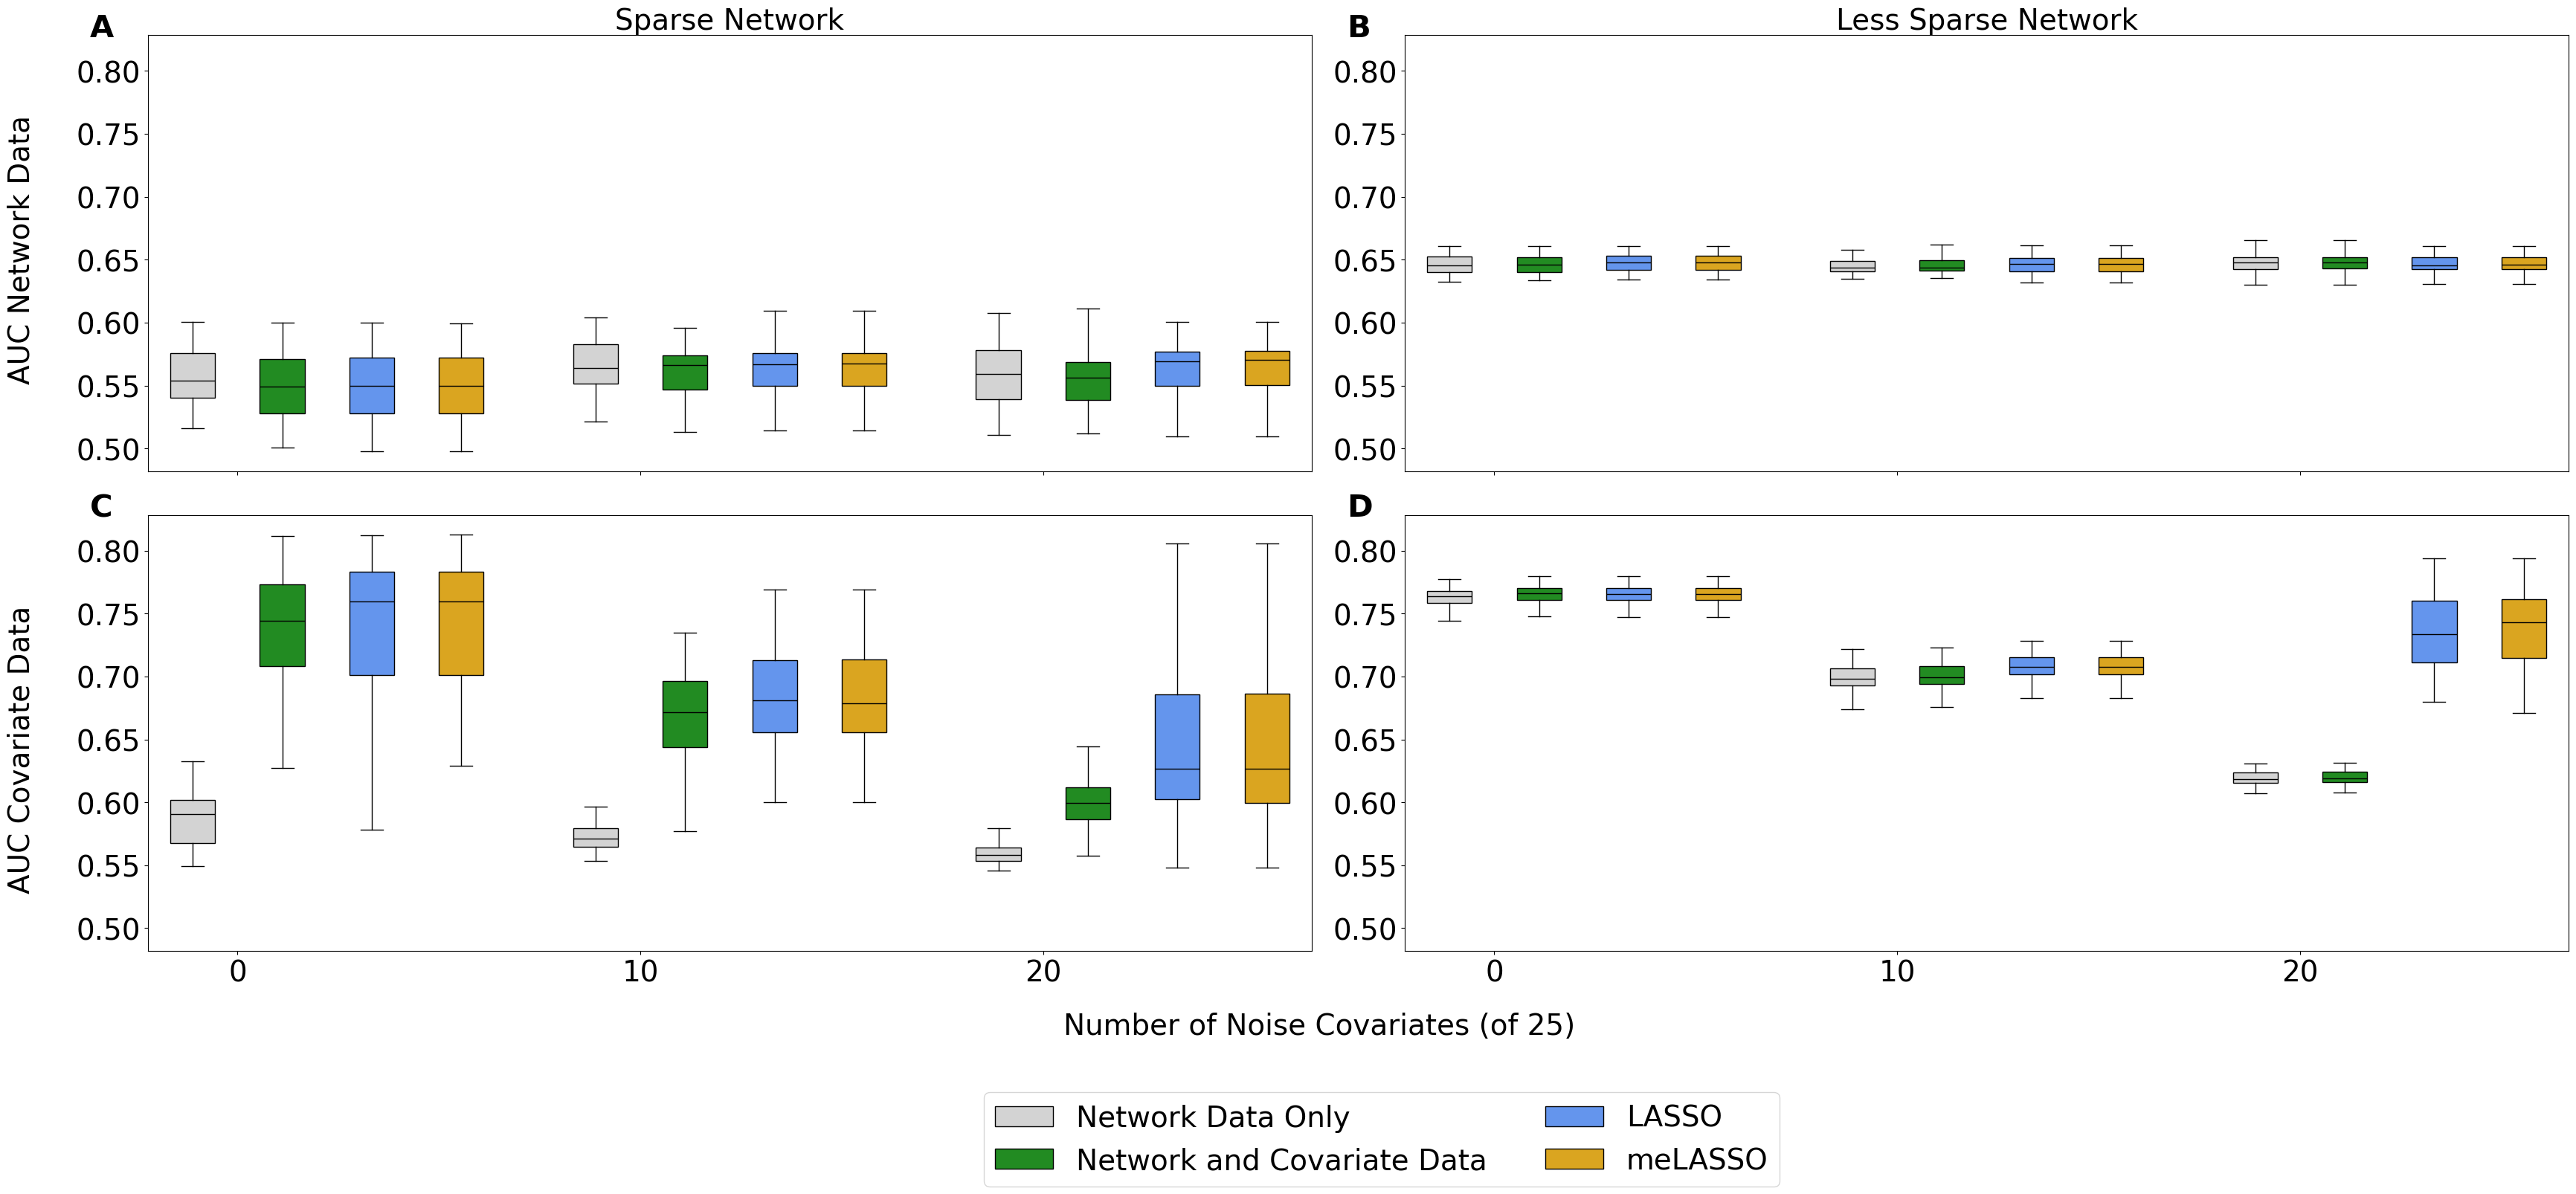

In [38]:
### Combined 2x2 figure

import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Font sizes (your settings)
# -------------------------
SMALL_SIZE = 28
MEDIUM_SIZE = 30
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

# -------------------------
# Shared x positions
# -------------------------
n = 4.5
pos_nocov   = list(np.arange(0, n*3, n))
pos_nolasso = list(np.arange(1, n*3, n))
pos_adapt   = list(np.arange(2, n*3, n))
pos_MEadapt = list(np.arange(3, n*3, n))

group_midpoints = [(a + b) / 2 for (a, b) in zip(pos_nocov, pos_nolasso)]
group_labels = ['0', '10', '20']

# -------------------------
# Helper to plot one "figure" (top=aucA, bottom=aucY) into a column
# -------------------------
def add_boxes(ax_top, ax_bottom, datA, datY):
    colors = {
        "nocov": "lightgray",
        "nolasso": "forestgreen",
        "adapt": "cornflowerblue",
        "MEadapt": "goldenrod",
    }

    def _draw(ax, d):
        b1 = ax.boxplot(d["nocov"],   showfliers=False, positions=pos_nocov,   patch_artist=True)
        b2 = ax.boxplot(d["nolasso"], showfliers=False, positions=pos_nolasso, patch_artist=True)
        b3 = ax.boxplot(d["adapt"],   showfliers=False, positions=pos_adapt,   patch_artist=True)
        b4 = ax.boxplot(d["MEadapt"], showfliers=False, positions=pos_MEadapt, patch_artist=True)

        for patch in b1["boxes"]: patch.set_facecolor(colors["nocov"])
        for patch in b2["boxes"]: patch.set_facecolor(colors["nolasso"])
        for patch in b3["boxes"]: patch.set_facecolor(colors["adapt"])
        for patch in b4["boxes"]: patch.set_facecolor(colors["MEadapt"])

        for med in b1["medians"]: med.set_color("black")
        for med in b2["medians"]: med.set_color("black")
        for med in b3["medians"]: med.set_color("black")
        for med in b4["medians"]: med.set_color("black")

        # return handles for legend
        return (b1["boxes"][0], b2["boxes"][0], b3["boxes"][0], b4["boxes"][0])

    handles = _draw(ax_top, datA)
    _draw(ax_bottom, datY)

    ax_bottom.set_xticks(group_midpoints)
    ax_bottom.set_xticklabels(group_labels)

    return handles

# -------------------------
# Build "new" data (your Graph 1)
# -------------------------
datA_new = {
    "nocov":   [[x[-1] for x in nocov_0noise_auc_A],   [x[-1] for x in nocov_10noise_auc_A],   [x[-1] for x in nocov_20noise_auc_A]],
    "nolasso": [[x[-1] for x in nolasso_0noise_auc_A], [x[-1] for x in nolasso_10noise_auc_A], [x[-1] for x in nolasso_20noise_auc_A]],
    "adapt":   [[x[-1] for x in glasso_0noise_auc_A],  [x[-1] for x in glasso_10noise_auc_A],  [x[-1] for x in glasso_20noise_auc_A]],
    "MEadapt": [[x[-1] for x in MEglasso_0noise_auc_A],[x[-1] for x in MEglasso_10noise_auc_A],[x[-1] for x in MEglasso_20noise_auc_A]],
}
datY_new = {
    "nocov":   [[x[-1] for x in nocov_0noise_auc_Y],   [x[-1] for x in nocov_10noise_auc_Y],   [x[-1] for x in nocov_20noise_auc_Y]],
    "nolasso": [[x[-1] for x in nolasso_0noise_auc_Y], [x[-1] for x in nolasso_10noise_auc_Y], [x[-1] for x in nolasso_20noise_auc_Y]],
    "adapt":   [[x[-1] for x in glasso_0noise_auc_Y],  [x[-1] for x in glasso_10noise_auc_Y],  [x[-1] for x in glasso_20noise_auc_Y]],
    "MEadapt": [[x[-1] for x in MEglasso_0noise_auc_Y],[x[-1] for x in MEglasso_10noise_auc_Y],[x[-1] for x in MEglasso_20noise_auc_Y]],
}

# -------------------------
# Build "old/d2" data (your Graph 2)
# -------------------------
datA_d2 = {
    "nocov":   [[x[-1] for x in nocov_0noise_auc_A_d2],   [x[-1] for x in nocov_10noise_auc_A_d2],   [x[-1] for x in nocov_20noise_auc_A_d2]],
    "nolasso": [[x[-1] for x in nolasso_0noise_auc_A_d2], [x[-1] for x in nolasso_10noise_auc_A_d2], [x[-1] for x in nolasso_20noise_auc_A_d2]],
    "adapt":   [[x[-1] for x in glasso_0noise_auc_A_d2],  [x[-1] for x in glasso_10noise_auc_A_d2],  [x[-1] for x in glasso_20noise_auc_A_d2]],
    "MEadapt": [[x[-1] for x in MEglasso_0noise_auc_A_d2],[x[-1] for x in MEglasso_10noise_auc_A_d2],[x[-1] for x in MEglasso_20noise_auc_A_d2]],
}
datY_d2 = {
    "nocov":   [[x[-1] for x in nocov_0noise_auc_Y_d2],   [x[-1] for x in nocov_10noise_auc_Y_d2],   [x[-1] for x in nocov_20noise_auc_Y_d2]],
    "nolasso": [[x[-1] for x in nolasso_0noise_auc_Y_d2], [x[-1] for x in nolasso_10noise_auc_Y_d2], [x[-1] for x in nolasso_20noise_auc_Y_d2]],
    "adapt":   [[x[-1] for x in glasso_0noise_auc_Y_d2],  [x[-1] for x in glasso_10noise_auc_Y_d2],  [x[-1] for x in glasso_20noise_auc_Y_d2]],
    "MEadapt": [[x[-1] for x in MEglasso_0noise_auc_Y_d2],[x[-1] for x in MEglasso_10noise_auc_Y_d2],[x[-1] for x in MEglasso_20noise_auc_Y_d2]],
}

# -------------------------
# Make combined figure: 2 rows x 2 cols, shared y-axis across everything
# -------------------------
fig, axs = plt.subplots(
    2, 2,
    figsize=(42, 16),
    sharey=True,          # same y-axis across all panels
    sharex=True,
    gridspec_kw={"hspace": 0.10, "wspace": 0.08}
)

# Left column = "new", Right column = "d2"
handles = add_boxes(axs[0, 0], axs[1, 0], datA_new, datY_new)
_       = add_boxes(axs[0, 1], axs[1, 1], datA_d2, datY_d2)

# Column titles (optional)
axs[0, 0].set_title("Sparse Network")
axs[0, 1].set_title("Less Sparse Network")

# copy y axis to right column
for ax in axs[:, 1]:  # right-hand column (top and bottom)
    ax.tick_params(axis="y", which="both", labelleft=True)  # show y tick labels

# Shared labels
fig.text(0.5, 0.04, 'Number of Noise Covariates (of 25)', ha='center')
fig.text(0.08, 0.70, 'AUC Network Data', va='center', rotation='vertical')
fig.text(0.08, 0.28, 'AUC Covariate Data', va='center', rotation='vertical')

panel_labels = {(0, 0): "A", (0, 1): "B",
                (1, 0): "C", (1, 1): "D"}

for (r, c), lab in panel_labels.items():
    axs[r, c].text(
        -0.05, 1.05, lab,
        transform=axs[r, c].transAxes,   # axes-relative coords
        ha="left", va="top",
        fontweight="bold",
        fontsize=BIGGER_SIZE
    )

# Force 0-1 scale for y axis:
#for ax in axs.ravel():
#    ax.set_ylim(0.0, 1.0)

# One legend for the whole figure
fig.legend(
    handles,
    ['Network Data Only', 'Network and Covariate Data', 'LASSO', 'meLASSO'],
    loc='lower center',
    bbox_to_anchor=(0.52, -0.1),
    ncol=2
)

plt.tight_layout(rect=[0.03, 0.07, 1, 1])  # leave room for legend/x label
plt.savefig('boxplot_combined_side_by_side_20260108.eps', dpi=600, bbox_inches="tight")
#plt.show()


## Variable selection check

Determine the proportion of variables that should be dropped (indices 8-32) that are dropped and the proportion of variables that should not be dropped (indices 0-7) that are dropped

In [30]:
def variable_selection_perf(remlist, ntrue):
    nfalse = 25 - ntrue
    
    if nfalse == 0:
        nfalse_div = 1
    else:
        nfalse_div = nfalse
        
    drop_false = [len([x for x in sub if x >= ntrue]) for sub in remlist]
    drop_true = [len([x for x in sub if x < ntrue]) for sub in remlist]
    
    kept_true = [ntrue - x for x in drop_true]
    kept_false = [nfalse - x for x in drop_false]
    
    sens = [x / np.max([(x + y), 1]) for x,y in zip(drop_false, drop_true)]#zip(kept_true, kept_false)]
    spec = [x / np.max([(x+y),1]) for x,y in zip(kept_true, kept_false)]#zip(drop_false, drop_true)]
    
    print("N true: ", np.mean(ntrue))
    print("Kept true: ", np.mean(kept_true))
    print("Drop false: ", np.mean(drop_false))
    
    #return(np.mean(sens), np.mean(spec))
    return(np.mean([x/nfalse_div for x in drop_false]), np.mean([x/ntrue for x in kept_true]))

rem0, keep0 = variable_selection_perf(r0, 25)
rem10, keep10 = variable_selection_perf(r10, 15)
rem20, keep20 = variable_selection_perf(r20, 5)

MErem0, MEkeep0 = variable_selection_perf(MEr0, 25)
MErem10, MEkeep10 = variable_selection_perf(MEr10, 15)
MErem20, MEkeep20 = variable_selection_perf(MEr20, 5)

rem0_d2, keep0_d2 = variable_selection_perf(r0_d2, 25)
rem10_d2, keep10_d2 = variable_selection_perf(r10_d2, 15)
rem20_d2, keep20_d2 = variable_selection_perf(r20_d2, 5)

MErem0_d2, MEkeep0_d2 = variable_selection_perf(MEr0_d2, 25)
MErem10_d2, MEkeep10_d2 = variable_selection_perf(MEr10_d2, 15)
MErem20_d2, MEkeep20_d2 = variable_selection_perf(MEr20_d2, 5)

N true:  25.0
Kept true:  24.933333333333334
Drop false:  0.0
N true:  15.0
Kept true:  14.5
Drop false:  1.1666666666666667
N true:  5.0
Kept true:  3.2
Drop false:  11.066666666666666
N true:  25.0
Kept true:  24.933333333333334
Drop false:  0.0
N true:  15.0
Kept true:  14.5
Drop false:  1.1666666666666667
N true:  5.0
Kept true:  3.2
Drop false:  11.066666666666666
N true:  25.0
Kept true:  25.0
Drop false:  0.0
N true:  15.0
Kept true:  15.0
Drop false:  1.2
N true:  5.0
Kept true:  5.0
Drop false:  17.1
N true:  25.0
Kept true:  25.0
Drop false:  0.0
N true:  15.0
Kept true:  15.0
Drop false:  1.2
N true:  5.0
Kept true:  5.0
Drop false:  17.366666666666667


In [31]:
print(rem0, keep0 )
print(rem10, keep10) 
print(rem20, keep20 )

print(MErem0, MEkeep0) 
print(MErem10, MEkeep10) 
print(MErem20, MEkeep20) 

print(rem0_d2, keep0_d2 )
print(rem10_d2, keep10_d2)
print(rem20_d2, keep20_d2 )

print(MErem0_d2, MEkeep0_d2) 
print(MErem10_d2, MEkeep10_d2)
print(MErem20_d2, MEkeep20_d2 )

0.0 0.9973333333333334
0.11666666666666667 0.9666666666666667
0.5533333333333332 0.64
0.0 0.9973333333333334
0.11666666666666667 0.9666666666666667
0.5533333333333332 0.64
0.0 1.0
0.12000000000000001 1.0
0.855 1.0
0.0 1.0
0.12000000000000001 1.0
0.8683333333333331 1.0


## Matrix difference checks

Compare the Z matrices to the true values

In [32]:
def load_Z_true(noise_dim, date, a_high, a_range, nsims):
    k = 2
    n = 200
    q = 25
    B_mu = 1
    B_sigma = 0.1

    a_high_text = str(a_high).replace(".","").replace("-", "neg")
    a_range_text = str(a_range).replace(".","").replace("-", "neg")

    Z_list = []

    for i in range(nsims):
        seed_num = i + 1

        with open(str('/n/home04/ecrenshaw/latent_joint_estim/simulated_data/simdata_' + 'n' + str(n) + '_k' + str(k) + "_noiseq" + str(noise_dim) +'-' +  str(q) + '_btypeN' + 
                          str(B_mu) + str(B_sigma) + '_a' + str(a_high_text) + str(a_range_text) + "_" + str(data_date) + '_' + str(seed_num) +'.pkl'), 'rb') as f:
                input_data = pickle.load(f)

        Z_in = input_data[3]

        Z_list.append(Z_in)
        
    return(Z_list)



In [33]:
a_high = -0.5
a_range = 0.5
data_date = "2024-12-02"
nsims = 30

Z_list0_d2 = load_Z_true(0, data_date, a_high, a_range, nsims)
Z_list10_d2 = load_Z_true(10, data_date, a_high, a_range, nsims)
Z_list20_d2 = load_Z_true(20, data_date, a_high, a_range, nsims)

In [34]:
a_high = -2
a_range = 1
data_date = "2025-03-27"
nsims = 30

Z_list0 = load_Z_true(0, data_date, a_high, a_range, nsims)
Z_list10 = load_Z_true(10, data_date, a_high, a_range, nsims)
Z_list20 = load_Z_true(20, data_date, a_high, a_range, nsims)

In [35]:
diff0_nocov, diff0_nolasso, diff0_glasso, diff0_MEglasso = [], [], [], []
for i in range(30):
    diff0_nocov.append(mat_change(Z_list0[i], nocov_0noise_Z[i]))
    diff0_nolasso.append(mat_change(Z_list0[i], nolasso_0noise_Z[i]))
    diff0_glasso.append(mat_change(Z_list0[i], glasso_0noise_Z[i]))
    diff0_MEglasso.append(mat_change(Z_list0[i], MEglasso_0noise_Z[i]))
                 
diff10_nocov, diff10_nolasso, diff10_glasso, diff10_MEglasso = [], [], [], []
for i in range(30):
    diff10_nocov.append(mat_change(Z_list10[i], nocov_10noise_Z[i]))
    diff10_nolasso.append(mat_change(Z_list10[i], nolasso_10noise_Z[i]))
    diff10_glasso.append(mat_change(Z_list10[i], glasso_10noise_Z[i]))
    diff10_MEglasso.append(mat_change(Z_list10[i], MEglasso_10noise_Z[i]))
                 
diff20_nocov, diff20_nolasso, diff20_glasso, diff20_MEglasso = [], [], [], []
for i in range(5):
    diff20_nocov.append(mat_change(Z_list20[i], nocov_20noise_Z[i]))
    diff20_nolasso.append(mat_change(Z_list20[i], nolasso_20noise_Z[i]))
    diff20_glasso.append(mat_change(Z_list20[i], glasso_20noise_Z[i]))
    diff20_MEglasso.append(mat_change(Z_list20[i], MEglasso_20noise_Z[i]))
                 
        
# denser version
diff0_nocov_d2, diff0_nolasso_d2, diff0_glasso_d2, diff0_MEglasso_d2 = [], [], [], []
for i in range(30):
    diff0_nocov_d2.append(mat_change(Z_list0_d2[i], nocov_0noise_Z_d2[i]))
    diff0_nolasso_d2.append(mat_change(Z_list0_d2[i], nolasso_0noise_Z_d2[i]))
    diff0_glasso_d2.append(mat_change(Z_list0_d2[i], glasso_0noise_Z_d2[i]))
    diff0_MEglasso_d2.append(mat_change(Z_list0_d2[i], MEglasso_0noise_Z_d2[i]))
                 
diff10_nocov_d2, diff10_nolasso_d2, diff10_glasso_d2, diff10_MEglasso_d2 = [], [], [], []
for i in range(30):
    diff10_nocov_d2.append(mat_change(Z_list10_d2[i], nocov_10noise_Z_d2[i]))
    diff10_nolasso_d2.append(mat_change(Z_list10_d2[i], nolasso_10noise_Z_d2[i]))
    diff10_glasso_d2.append(mat_change(Z_list10_d2[i], glasso_10noise_Z_d2[i]))
    diff10_MEglasso_d2.append(mat_change(Z_list10_d2[i], MEglasso_10noise_Z_d2[i]))
                 
diff20_nocov_d2, diff20_nolasso_d2, diff20_glasso_d2, diff20_MEglasso_d2 = [], [], [], []
for i in range(5):
    diff20_nocov_d2.append(mat_change(Z_list20_d2[i], nocov_20noise_Z_d2[i]))
    diff20_nolasso_d2.append(mat_change(Z_list20_d2[i], nolasso_20noise_Z_d2[i]))
    diff20_glasso_d2.append(mat_change(Z_list20_d2[i], glasso_20noise_Z_d2[i]))
    diff20_MEglasso_d2.append(mat_change(Z_list20_d2[i], MEglasso_20noise_Z_d2[i]))
                 


In [36]:
print("Sparse, noise 0, nocov: ", np.mean(diff0_nocov), " (", np.std(diff0_nocov), ")")
print("Sparse, noise 0, nolasso: ", np.mean(diff0_nolasso), " (", np.std(diff0_nolasso), ")")
print("Sparse, noise 0, glasso: ", np.mean(diff0_glasso), " (", np.std(diff0_glasso), ")")
print("Sparse, noise 0, MEglasso: ", np.mean(diff0_MEglasso), " (", np.std(diff0_MEglasso), ")")

print("Sparse, noise 10, nocov: ", np.mean(diff10_nocov), " (", np.std(diff10_nocov), ")")
print("Sparse, noise 10, nolasso: ", np.mean(diff10_nolasso), " (", np.std(diff10_nolasso), ")")
print("Sparse, noise 10, glasso: ", np.mean(diff10_glasso), " (", np.std(diff10_glasso), ")")
print("Sparse, noise 10, MEglasso: ", np.mean(diff10_MEglasso), " (", np.std(diff10_MEglasso), ")")

print("Sparse, noise 20, nocov: ", np.mean(diff20_nocov), " (", np.std(diff20_nocov), ")")
print("Sparse, noise 20, nolasso: ", np.mean(diff20_nolasso), " (", np.std(diff20_nolasso), ")")
print("Sparse, noise 20, glasso: ", np.mean(diff20_glasso), " (", np.std(diff20_glasso), ")")
print("Sparse, noise 20, MEglasso: ", np.mean(diff20_MEglasso), " (", np.std(diff20_MEglasso), ")")

Sparse, noise 0, nocov:  3.059566215191089  ( 0.5134944599922635 )
Sparse, noise 0, nolasso:  3.9476354001397342  ( 1.8969811335477755 )
Sparse, noise 0, glasso:  3.5642910095654434  ( 1.9068819107586958 )
Sparse, noise 0, MEglasso:  3.5567763017575085  ( 1.898450317834368 )
Sparse, noise 10, nocov:  3.2392626029556477  ( 0.7854194402166983 )
Sparse, noise 10, nolasso:  4.598141174052996  ( 1.8965516168515686 )
Sparse, noise 10, glasso:  4.056606079533901  ( 2.5029674168699962 )
Sparse, noise 10, MEglasso:  4.085976565105621  ( 2.5646019873938544 )
Sparse, noise 20, nocov:  3.0707742045698523  ( 0.33367076084835123 )
Sparse, noise 20, nolasso:  3.956479910092739  ( 1.1010150737328461 )
Sparse, noise 20, glasso:  4.137691683643872  ( 1.0863957392952488 )
Sparse, noise 20, MEglasso:  4.136968701440128  ( 1.0854656337626767 )


In [37]:
print("Dense, noise 0, nocov: ", np.mean(diff0_nocov_d2), " (", np.std(diff0_nocov_d2), ")")
print("Dense, noise 0, nolasso: ", np.mean(diff0_nolasso_d2), " (", np.std(diff0_nolasso_d2), ")")
print("Dense, noise 0, glasso: ", np.mean(diff0_glasso_d2), " (", np.std(diff0_glasso_d2), ")")
print("Dense, noise 0, MEglasso: ", np.mean(diff0_MEglasso_d2), " (", np.std(diff0_MEglasso_d2), ")")

print("Dense, noise 10, nocov: ", np.mean(diff10_nocov_d2), " (", np.std(diff10_nocov_d2), ")")
print("Dense, noise 10, nolasso: ", np.mean(diff10_nolasso_d2), " (", np.std(diff10_nolasso_d2), ")")
print("Dense, noise 10, glasso: ", np.mean(diff10_glasso_d2), " (", np.std(diff10_glasso_d2), ")")
print("Dense, noise 10, MEglasso: ", np.mean(diff10_MEglasso_d2), " (", np.std(diff10_MEglasso_d2), ")")

print("Dense, noise 20, nocov: ", np.mean(diff20_nocov_d2), " (", np.std(diff20_nocov_d2), ")")
print("Dense, noise 20, nolasso: ", np.mean(diff20_nolasso_d2), " (", np.std(diff20_nolasso_d2), ")")
print("Dense, noise 20, glasso: ", np.mean(diff20_glasso_d2), " (", np.std(diff20_glasso_d2), ")")
print("Dense, noise 20, MEglasso: ", np.mean(diff20_MEglasso_d2), " (", np.std(diff20_MEglasso_d2), ")")

Dense, noise 0, nocov:  0.2521178731853268  ( 0.24200591623757176 )
Dense, noise 0, nolasso:  0.24500068983589796  ( 0.23483632593614726 )
Dense, noise 0, glasso:  0.2357115023310482  ( 0.2147643636938756 )
Dense, noise 0, MEglasso:  0.23571144576942385  ( 0.2147643521734113 )
Dense, noise 10, nocov:  0.25503710696020854  ( 0.27243610856672257 )
Dense, noise 10, nolasso:  0.23758576316067967  ( 0.20095119645670007 )
Dense, noise 10, glasso:  0.23352471006092934  ( 0.1259633716588421 )
Dense, noise 10, MEglasso:  0.23352445829330276  ( 0.12596340466564307 )
Dense, noise 20, nocov:  0.6314679744395407  ( 0.8656946542297109 )
Dense, noise 20, nolasso:  0.6307816547464942  ( 0.8670539816452583 )
Dense, noise 20, glasso:  0.22465075848268895  ( 0.07221050442213711 )
Dense, noise 20, MEglasso:  0.22465075248847372  ( 0.07221056990564208 )


In [68]:
np.geomspace(0.3, 1e-3, 10)

array([0.3       , 0.15917892, 0.08445976, 0.04481405, 0.02377817,
       0.01261661, 0.00669433, 0.00355199, 0.00188467, 0.001     ])

In [69]:
np.linspace(0.3,1e-2, 10)

array([0.3       , 0.26777778, 0.23555556, 0.20333333, 0.17111111,
       0.13888889, 0.10666667, 0.07444444, 0.04222222, 0.01      ])